In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [ ]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

# EDA

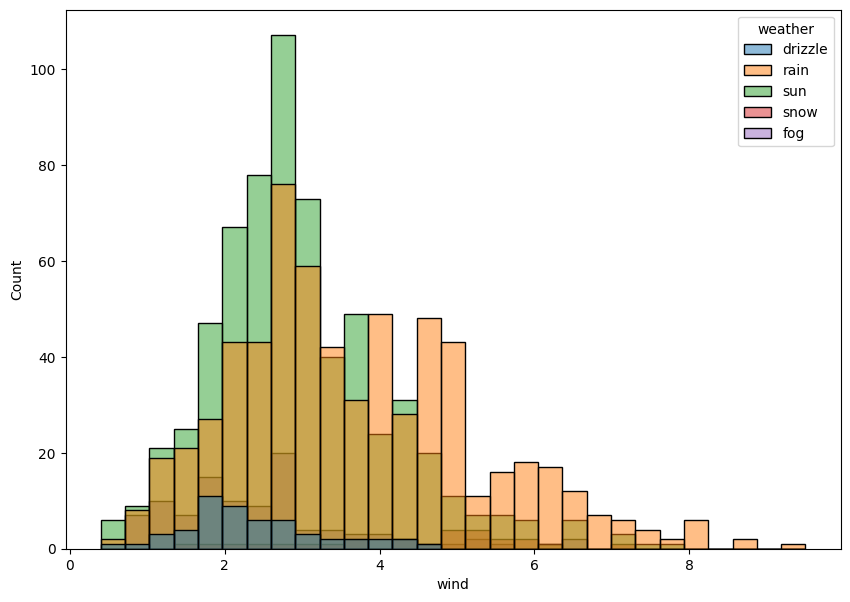

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x='wind',hue='weather',data=df)
plt.show()

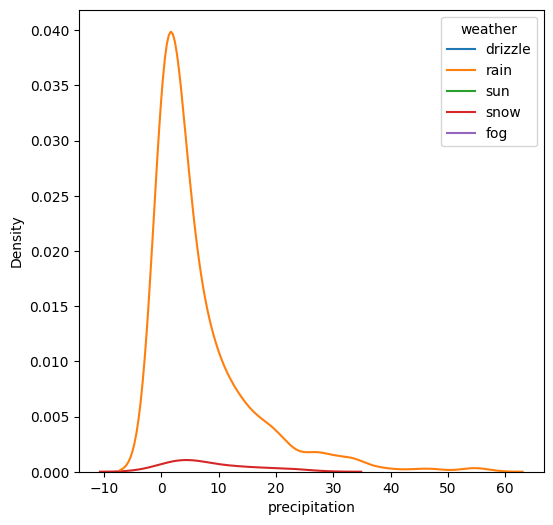

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(x='precipitation',hue='weather',data=df)
plt.show()

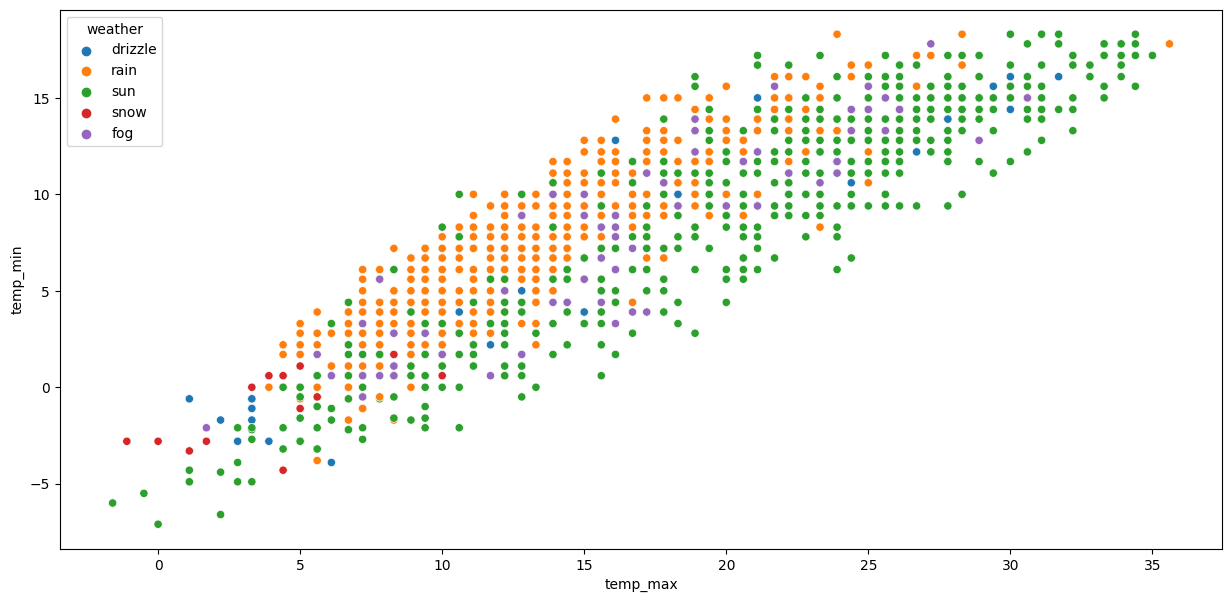

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='temp_max',y='temp_min',hue='weather',data=df)
plt.show()

#Predicting The Weather

In [ ]:
X=df[['precipitation','temp_max','temp_min','wind']]
Y=df['weather']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

,precipitation,temp_max,temp_min,wind
1135,6.1,13.3,8.3,2.5
1214,0.0,16.1,7.2,4.7
1407,6.6,11.1,7.8,1.8
811,0.0,11.1,1.1,1.8
985,0.0,24.4,12.8,5.9
...,...,...,...,...
763,0.0,8.9,1.1,2.5
835,0.5,14.4,7.8,4.0
1216,0.0,18.3,8.9,3.7
559,0.0,26.1,11.1,3.1


In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = GNB.predict(X_test)

In [ ]:
Y_pred

array(['sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'snow',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'snow', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'sun', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain

In [ ]:
CM = confusion_matrix(Y_test, Y_pred)

In [ ]:
CM

array([[  0,   0,   0,   0,  11],
       [  0,   0,   0,   0,  31],
       [  0,   0, 141,   2,  12],
       [  0,   0,   2,   4,   0],
       [  0,   0,   0,   0, 163]])

In [ ]:
print(GNB.predict([[2.5,1.7,-2.8,5.0]])[0])

snow


In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         0
         fog       0.00      0.00      0.00         0
        rain       0.91      0.99      0.95       143
        snow       0.67      0.67      0.67         6
         sun       1.00      0.75      0.86       217

    accuracy                           0.84       366
   macro avg       0.52      0.48      0.49       366
weighted avg       0.96      0.84      0.89       366



#Visualizing Our Predictions

In [ ]:
x=df[['precipitation','temp_max','temp_min','wind']]
y=df['weather']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_proba = classifier.predict_proba(x_test)
cmf = confusion_matrix(y_test, y_pred)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
y_proba_pred = np.where(y_proba[:,1] > 0.5, 1, 0)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

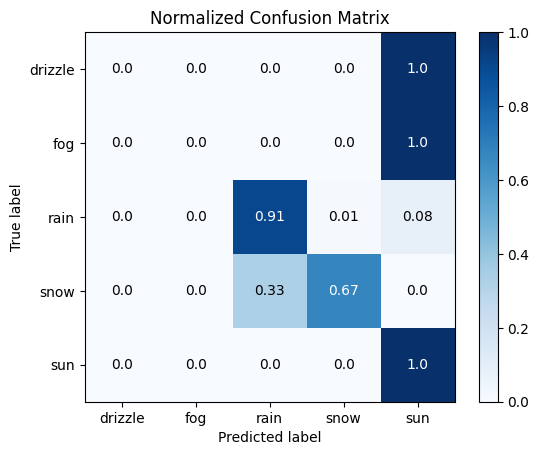

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

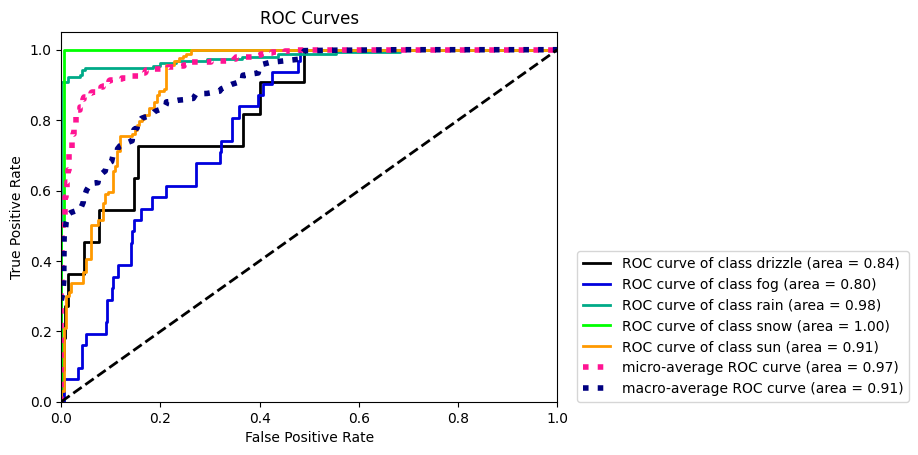

In [ ]:
skplt.metrics.plot_roc(y_test, y_proba)
plt.legend(loc=(1.04, 0))

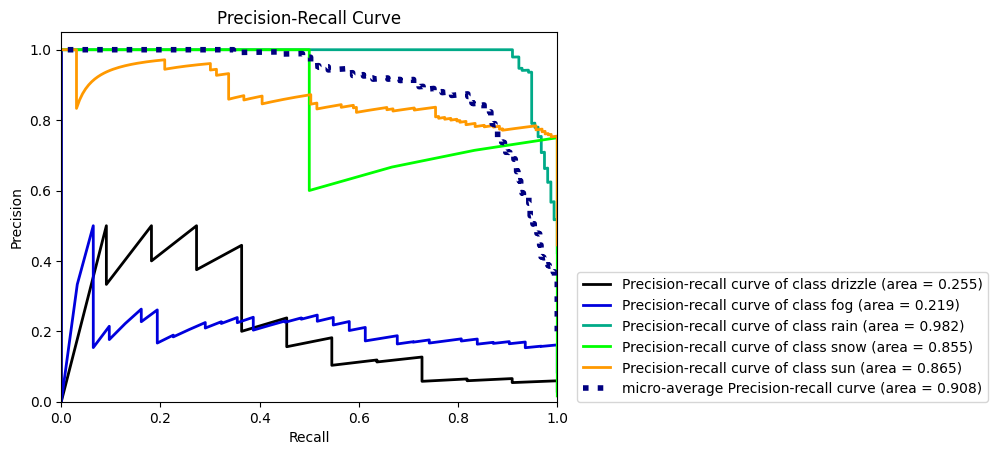

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_proba)
plt.legend(loc=(1.04, 0))
plt.show()